In [ ]:
!apt install -y tesseract-ocr  # Install Tesseract OCR
!pip install pymupdf pytesseract opencv-python pillow numpy  # Install required Python libraries

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 55.4 MB/s eta 0:00:00


In [ ]:
import cv2
import pytesseract
import fitz  # PyMuPDF
import numpy as np
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MTG_10009588.pdf to MTG_10009588.pdf


In [ ]:
doc = fitz.open(image_address)

# Extract text from the first page using a standard method (this will fail for scanned PDFs)
page = doc[0]  # Get the first page
text = page.get_text("text")  # Try extracting text

print("Extracted Text (Without OCR):")
print(text)

Extracted Text (Without OCR):



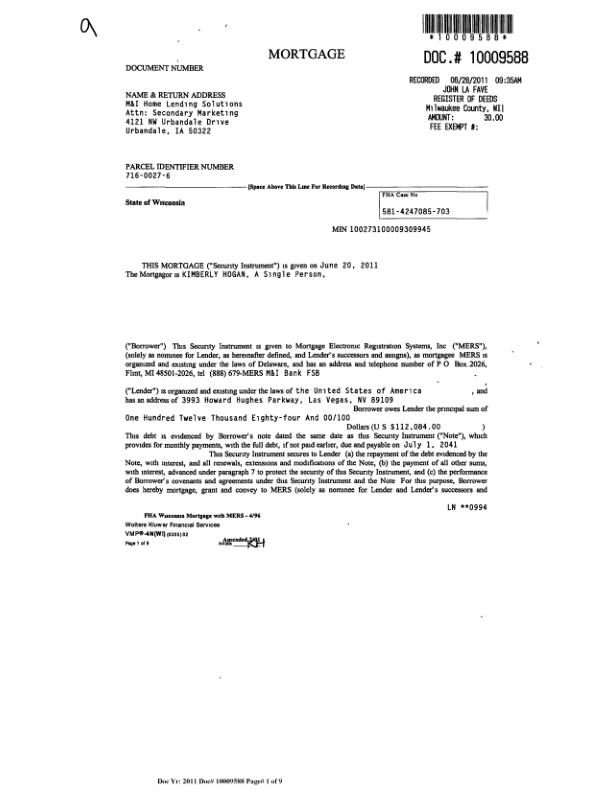

In [ ]:
# Convert the first page to an image
pix = page.get_pixmap()
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

# Display the image
display(img)

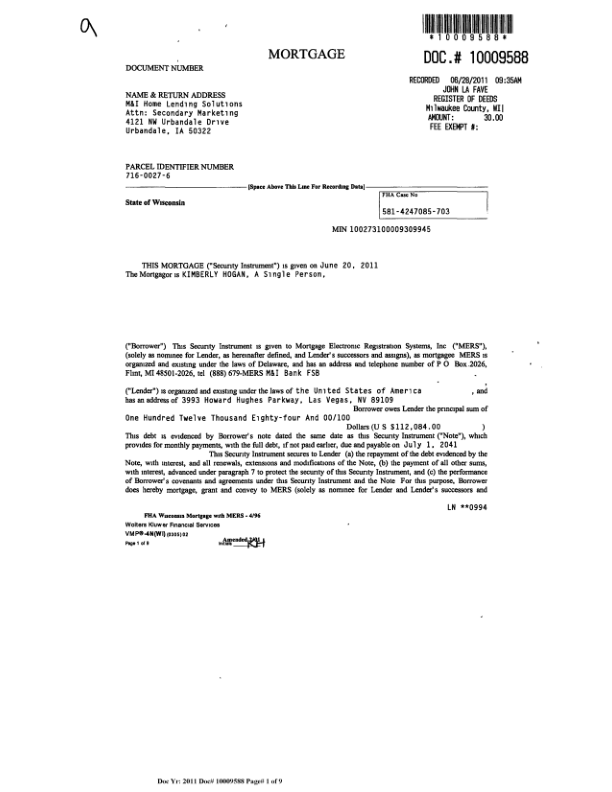

In [ ]:
# Convert the image to grayscale
img = np.array(img)  # Convert PIL image to NumPy array
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
display(Image.fromarray(gray))

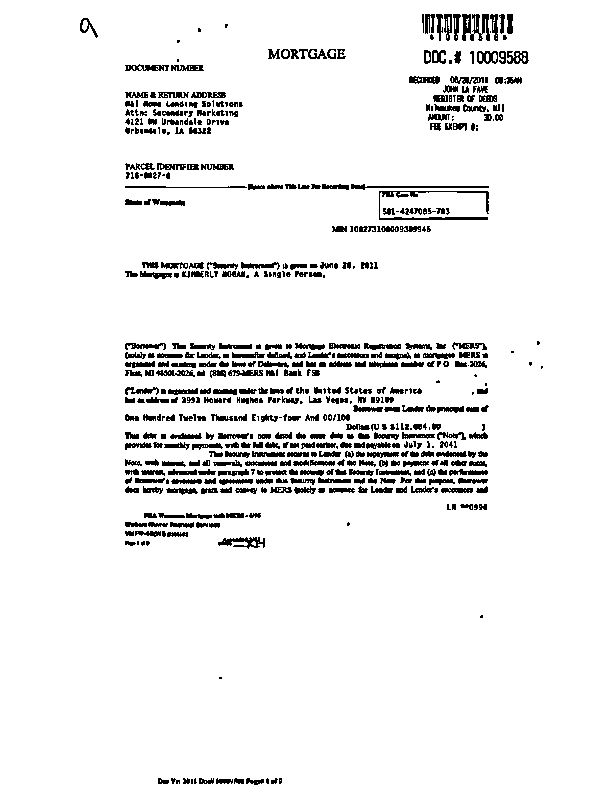

In [ ]:
# Apply adaptive thresholding to enhance contrast
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the processed image
display(Image.fromarray(gray))

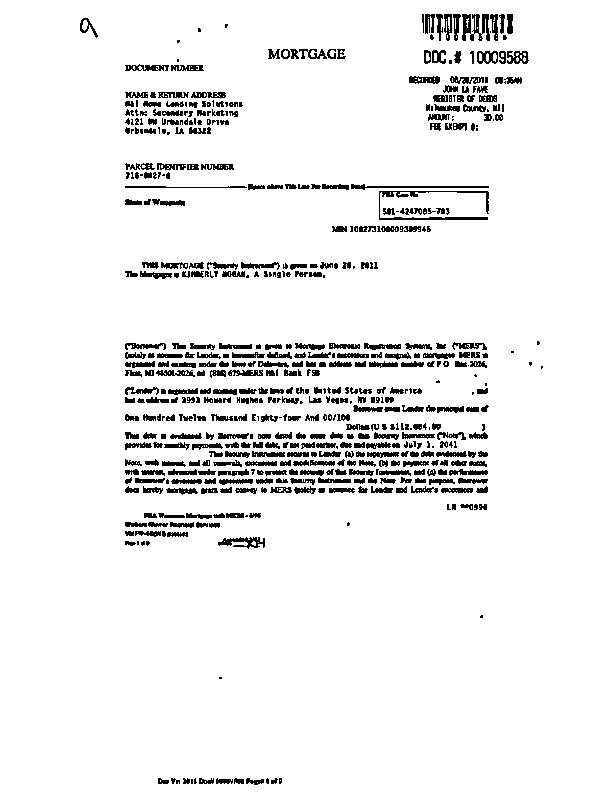

In [ ]:
# Apply Bilateral Filtering for noise reduction
gray = cv2.bilateralFilter(gray, 9, 75, 75)

# Display the processed image
display(Image.fromarray(gray))


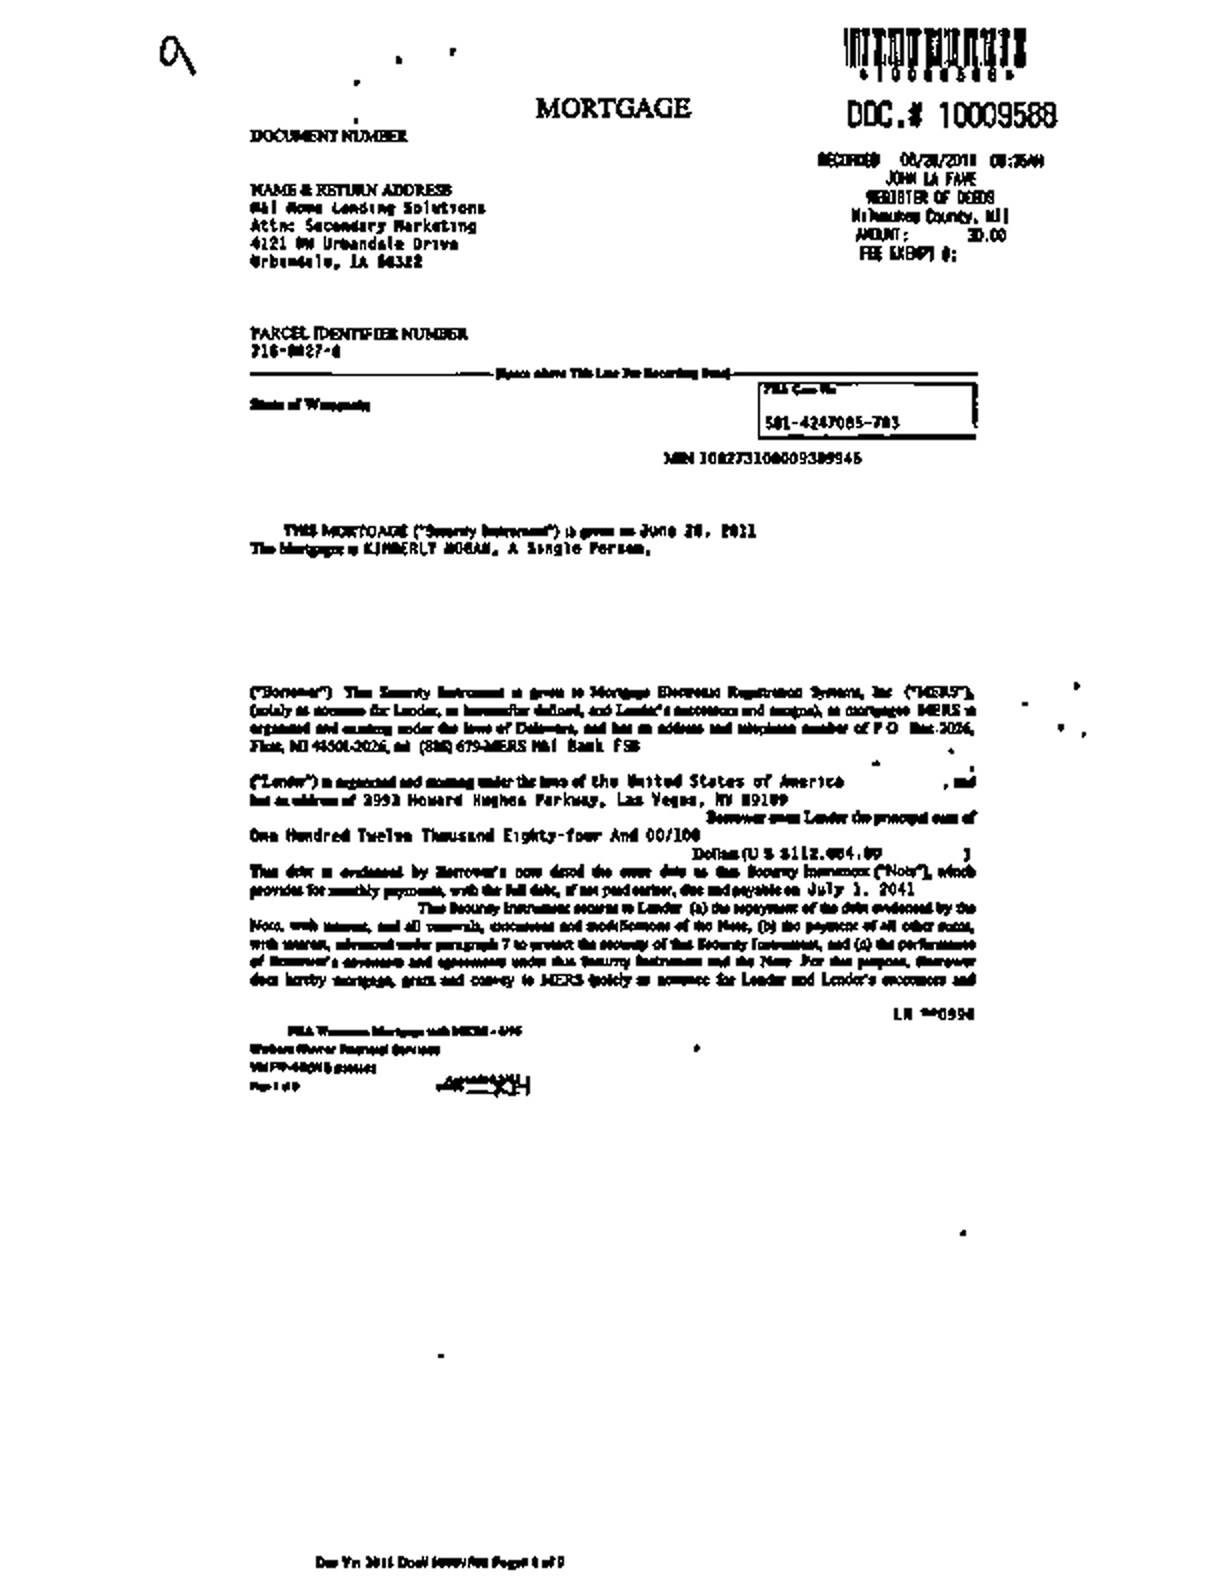

In [ ]:
# Resize image for better OCR accuracy
scale_percent = 200  # Increase image size by 200%
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_CUBIC)

# Display the resized image
display(Image.fromarray(gray))


In [ ]:
# Run OCR on the preprocessed image
custom_config = r'--oem 3 -l eng'
ocr_text = pytesseract.image_to_string(gray, config=custom_config)

# Print extracted text
print("OCR Extracted Text:\n")
print(ocr_text)

OCR Extracted Text:

a NRA

MORTGAGE

DOCSAENT KIMBER DOC.# 10009589

—— ana oo
alae SERIGTRR OF DDS
Seloe cacenseey marketing Wray Cuey a
aorrer iene
TARCEL IDENTIFIER NUMZER
F16-iz7-4@

Pica edkova Ths Lane er Mcriiyl

‘Seats of Ween
5H1-4247065-783

‘MEN 108273100005309545

THEE MORTOALAE (“Seversty Revtrprnamt) (> grr os Fug TH, BOIL
The bhertgage ws KIMMERLT WOEAM, A Sonal Perse,

CBorvemer"} Then Semerty ietrcment ot grevt 00 Sores Ehewean Reprremcs Dread, ee CMERT)
(Golaly 06 orm for Lender, on hewemefter deflood, tx) Lemar’ d tetcoteors and tecagne) of Cooreatee ERS
etpneened tied canter mer Get lowe of Delomers, tid bead am aceite tied epiatah dembiber of PO Mit. 2026, .
Flast, NI 4501-2008, at (SM STSMERS Ma Bah FSB ‘

Cleaner”) m artetcted 003 mcmmag units the me of the Uarted States of America rm

het ta chive of 2992 Howard Hughes Parkway, Las Yeqea, MV BOlUD

Serre ee Levter de pcg cum of
Ona Hondred Twelee Thausand Eigkty-foer And 00/106

Doles (U S $112.604,09 J
‘Tha Ge

In [ ]:
# Remove excessive newlines and extra spaces
ocr_text = " ".join(ocr_text.split())
print("Cleaned OCR Text:\n", ocr_text)

Cleaned OCR Text:
 a NRA MORTGAGE DOCSAENT KIMBER DOC.# 10009589 —— ana oo alae SERIGTRR OF DDS Seloe cacenseey marketing Wray Cuey a aorrer iene TARCEL IDENTIFIER NUMZER F16-iz7-4@ Pica edkova Ths Lane er Mcriiyl ‘Seats of Ween 5H1-4247065-783 ‘MEN 108273100005309545 THEE MORTOALAE (“Seversty Revtrprnamt) (> grr os Fug TH, BOIL The bhertgage ws KIMMERLT WOEAM, A Sonal Perse, CBorvemer"} Then Semerty ietrcment ot grevt 00 Sores Ehewean Reprremcs Dread, ee CMERT) (Golaly 06 orm for Lender, on hewemefter deflood, tx) Lemar’ d tetcoteors and tecagne) of Cooreatee ERS etpneened tied canter mer Get lowe of Delomers, tid bead am aceite tied epiatah dembiber of PO Mit. 2026, . Flast, NI 4501-2008, at (SM STSMERS Ma Bah FSB ‘ Cleaner”) m artetcted 003 mcmmag units the me of the Uarted States of America rm het ta chive of 2992 Howard Hughes Parkway, Las Yeqea, MV BOlUD Serre ee Levter de pcg cum of Ona Hondred Twelee Thausand Eigkty-foer And 00/106 Doles (U S $112.604,09 J ‘Tha Gem mt orxtanwed

In [ ]:
import re

# Fix common OCR errors
ocr_text = re.sub(r'\bL0AN\b', 'LOAN', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bM0RTGAGE\b', 'MORTGAGE', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\b1NTEREST\b', 'INTEREST', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'[^a-zA-Z0-9\s,.%-]', '', ocr_text)  # Remove unwanted symbols

print("Corrected OCR Text:\n", ocr_text)

Corrected OCR Text:
 a NRA MORTGAGE DOCSAENT KIMBER DOC. 10009589  ana oo alae SERIGTRR OF DDS Seloe cacenseey marketing Wray Cuey a aorrer iene TARCEL IDENTIFIER NUMZER F16-iz7-4 Pica edkova Ths Lane er Mcriiyl Seats of Ween 5H1-4247065-783 MEN 108273100005309545 THEE MORTOALAE Seversty Revtrprnamt  grr os Fug TH, BOIL The bhertgage ws KIMMERLT WOEAM, A Sonal Perse, CBorvemer Then Semerty ietrcment ot grevt 00 Sores Ehewean Reprremcs Dread, ee CMERT Golaly 06 orm for Lender, on hewemefter deflood, tx Lemar d tetcoteors and tecagne of Cooreatee ERS etpneened tied canter mer Get lowe of Delomers, tid bead am aceite tied epiatah dembiber of PO Mit. 2026, . Flast, NI 4501-2008, at SM STSMERS Ma Bah FSB  Cleaner m artetcted 003 mcmmag units the me of the Uarted States of America rm het ta chive of 2992 Howard Hughes Parkway, Las Yeqea, MV BOlUD Serre ee Levter de pcg cum of Ona Hondred Twelee Thausand Eigkty-foer And 00106 Doles U S 112.604,09 J Tha Gem mt orxtanwed by Serrowarn pow ded th

In [ ]:
# Extract loan amount if present in the text
loan_match = re.search(r"Amount[:\s$]*([\d,]+)", ocr_text, re.IGNORECASE)

if loan_match:
    loan_amount = loan_match.group(0)
    print(f"Extracted Loan Amount: ${loan_amount}")
else:
    print("No loan amount found in the text.")

No loan amount found in the text.


In [ ]:
# Extract bounding box data from OCR
ocr_data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# Print first 5 extracted words with bounding boxes
for i in range(5):
    print(f"Word: {ocr_data['text'][i]}, BBox: ({ocr_data['left'][i]}, {ocr_data['top'][i]}, {ocr_data['width'][i]}, {ocr_data['height'][i]})")

Word: , BBox: (0, 0, 1224, 1584)
Word: , BBox: (354, 28, 672, 58)
Word: , BBox: (354, 28, 672, 58)
Word: , BBox: (354, 28, 672, 58)
Word: a, BBox: (396, 48, 60, 16)


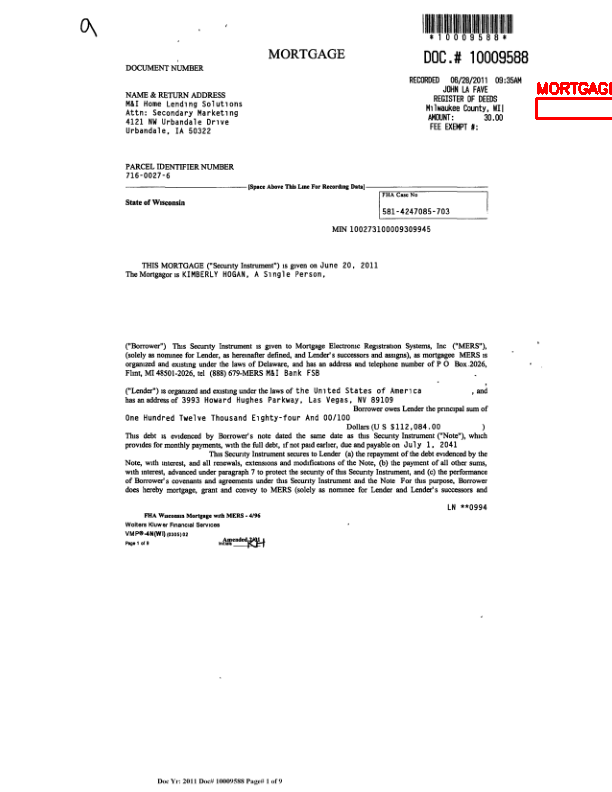

In [ ]:
key_fields = ["MORTGAGE", "NAME", "AMOUNT", "DATE", "ATN", "DOCUMENT"]

img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()  # Convert to uppercase for better matching
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:  # Highlight only key fields found in the document
        cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red bounding box
        cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))


In [ ]:
import json
extracted_data = {}

for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:
        extracted_data[word] = {
            "text": word,
            "bounding_box": [x, y, w, h]
        }

json_output = json.dumps(extracted_data, indent=4)

print(json_output)

{
    "MORTGAGE": {
        "text": "MORTGAGE",
        "bounding_box": [
            536,
            98,
            156,
            20
        ]
    },
    "NAME": {
        "text": "NAME",
        "bounding_box": [
            755,
            950,
            38,
            29
        ]
    }
}
